# Ising Model (incl. Monte Carlo & SW-algorithm)

In [ ]:
%matplotlib inline
import importlib
import time as tm
from importlib import reload
import Ising_simulation
reload(Ising_simulation)
from Ising_simulation import *

# Simulation initialisation
sim = SimpleNamespace(MC_steps = 1000,       # Number of monte carlo steps
                      L = 20,               # Grid size in 1 dimension
                      T = 3,                # Initial temperature
                      T_steps = 30,         # Number of temperature steps
                      dT = -0.05,           # Temperature increment
                      h = 0,                # Initial magnetic field
                      dh = 0,               # Magnetic increment
                      J = 1,                # Coupling J (Keep at 1)
                      kb = 1,               # Boltzman constant (Keep at 1)
                      eq_data_points = 900, # Number of equilibrium data points in MC steps
                      spin_init = 'up',     # Initial spin grid (up, down or random)
                      algorithm = 'SW',     # SW (Swendesen Wang) or SF (Spin Flip)
                      cor_cal = True,       # Determine if correlation time needs to be calculated
                      bs_trials = 10
                      )

sim.spin_site_total_number = sim.L**2       # Total number of spin sites
sim.MCS = sim.L**2                          # Montecarlo step size
sim.time_steps = sim.MCS * sim.MC_steps     # Montecarlo time to regular time steps

# Simulation results
results, grid_coordinates = IM_sim(sim)

In [ ]:
save_fig = True # Set to False to not overwrite images
plot_func(sim, results, save_fig)

In [ ]:
#WIP
results.c_v[:, 0] + results.c_v[:, 1]
length = len(results.c_v[:, 0] + results.c_v[:, 1])
plt.plot(results.temperature, results.c_v[:, 0] + results.c_v[:, 1], 'b_')
plt.plot(results.temperature, results.c_v[:, 0] , 'x')
plt.plot(results.temperature, results.c_v[:, 0] - results.c_v[:, 1], 'b_')
figure_directory = './exported_figs/'
plt.savefig(figure_directory + '_cv_1000SW.png')

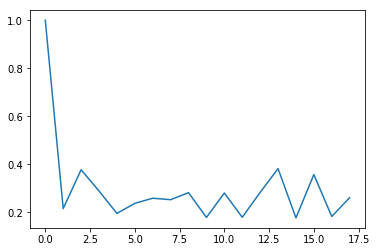

In [335]:
### Wip, plot of last correlation
data = results.cor_fun_chi
length = len(data)
plt.plot(range(length), data)
plt.show()


In [ ]:
def plot_func(self, results, save):
    figure_directory = './exported_figs/'
    
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rc('font', size=16)

    plt.plot(results.temperature, results.c_v, 'o')
    plt.xlabel('$\mathrm{k_b T/J}$', fontsize=18)
    plt.ylabel('$\mathrm{C_v}$', fontsize=18)
    plt.tight_layout()
    if save:
        plt.savefig(figure_directory + self.algorithm + '_cv.png')
    plt.close()

    plt.plot(results.temperature, results.chi, 'o')
    plt.xlabel('$\mathrm{k_b T/J}$', fontsize=18)
    plt.ylabel('$\chi$', fontsize=18)
    plt.tight_layout()
    if save:
        plt.savefig(figure_directory + self.algorithm + '_chi.png')
    plt.close()

    plt.plot(results.temperature, results.magnitization, 'o')
    plt.xlabel('$\mathrm{k_b T/J}$', fontsize=18)
    plt.ylabel('m', fontsize=18)    
    plt.tight_layout()
    if save:
        plt.savefig(figure_directory + self.algorithm + '_m.png')
    plt.close()
